# Energy Efficiency of Buildings  
This project predicts Heating and Cooling Load of buildings based on features such as surface area, roof area, wall area, and glazing area.  
Objective: Use machine learning models (Linear Regression, Random Forest) to estimate energy loads and help in designing sustainable, energy-efficient buildings.  


Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



Step 2: Load Dataset

In [3]:
df = pd.read_excel("ENB2012_data.xlsx")

# Rename columns
df = df.rename(columns={
    "X1":"Relative Compactness","X2":"Surface Area","X3":"Wall Area","X4":"Roof Area",
    "X5":"Overall Height","X6":"Orientation","X7":"Glazing Area","X8":"Glazing Area Distribution",
    "Y1":"Heating Load","Y2":"Cooling Load"
})

df.head()


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Step 3:Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


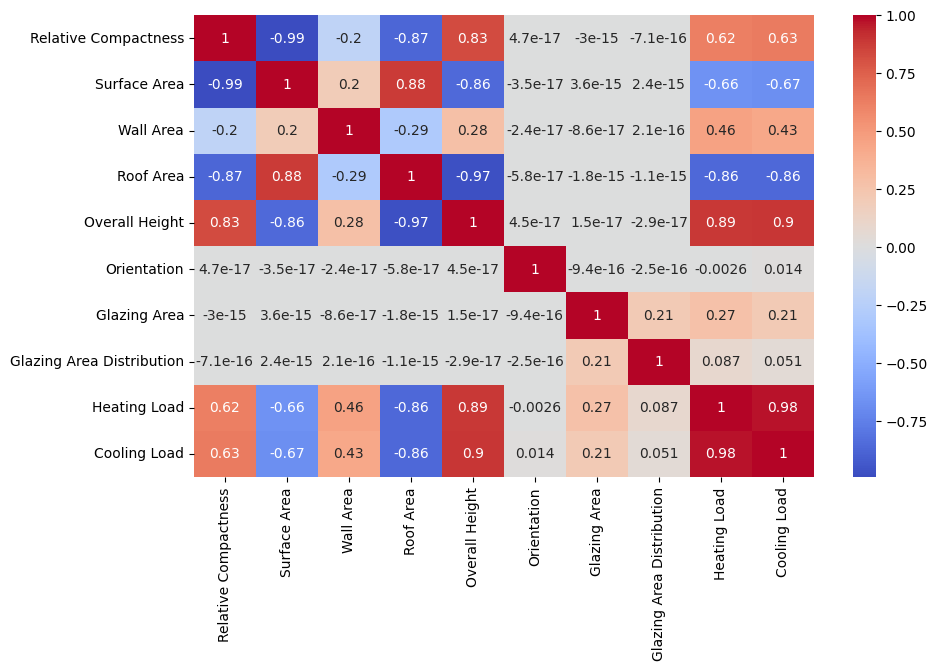

In [4]:
df.info()
df.describe()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Step 4: Define Features (X) and Targets (y)

In [6]:
num_features = ["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Glazing Area"]
cat_features = ["Orientation","Glazing Area Distribution"]

# Make a clean copy
X = df[num_features + cat_features].copy()
y_heat = df["Heating Load"]
y_cool = df["Cooling Load"]

# Convert categorical to string
for c in cat_features:
    X[c] = X[c].astype(str)

# Preprocessor: scale nums, one-hot encode cats
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])



Step 5:Train Model (Heating Load Example)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)

# Random Forest
rf_pipeline = Pipeline([
    ("pre", preprocessor),
    ("model", RandomForestRegressor(n_estimators=300, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
preds = rf_pipeline.predict(X_test)


Step 6:Evaluate Model

In [8]:
import numpy as np

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),  # manual sqrt
        "R2": r2_score(y_true, y_pred)
    }
print(evaluate(y_test, preds))


{'MAE': 0.36570173160172686, 'RMSE': np.float64(0.530839129247239), 'R2': 0.9972965205056517}


Step 7:Plot Predictions

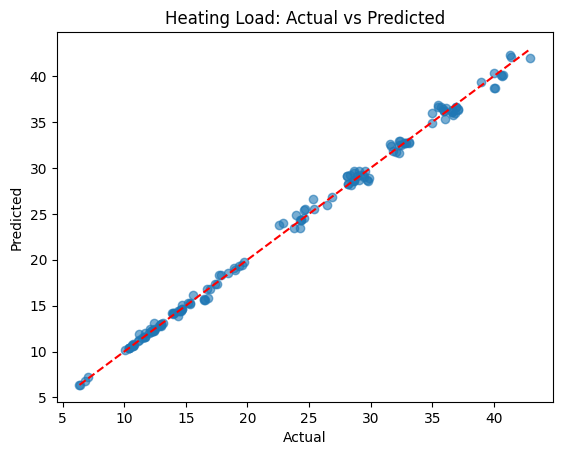

In [9]:
plt.scatter(y_test, preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Heating Load: Actual vs Predicted")
plt.show()


Step 8:Feature Importance (for Random Forest)

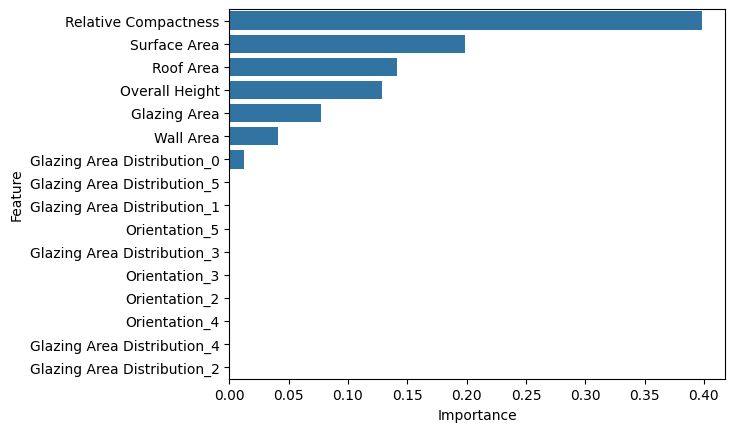

In [10]:
importances = rf_pipeline.named_steps["model"].feature_importances_
ohe = rf_pipeline.named_steps["pre"].named_transformers_["cat"]
cat_names = list(ohe.get_feature_names_out(cat_features))
feature_names = num_features + cat_names

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.show()


Step 9:Define pipeline: preprocessing + model

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define pipeline: preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])


Step 10: Repeat for Cooling Load

In [ ]:


# Define target variable (Cooling Load)
y_cool = df["Cooling Load"]   # ✅ fixed: use df instead of data

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cool, test_size=0.2, random_state=42
)

# Train model (using same model as Heating Load)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Evaluate performance
print("Cooling Load Evaluation:")
print(evaluate(y_test, preds))



Cooling Load Evaluation:
{'MAE': 1.262879220779221, 'RMSE': np.float64(2.027224087268106), 'R2': 0.9556468804876661}


MAE (Mean Absolute Error) = 1.26 → On average, the model is off by ~1.26 units in predicting Cooling Load.

RMSE (Root Mean Squared Error) = 2.03 → Most errors are around 2 units. (Smaller = better.)

R² (Coefficient of Determination) = 0.956 → The model explains 95.6% of the variation in Cooling Load.

Step 11:Plot Feature Importance(For Cooling Load)

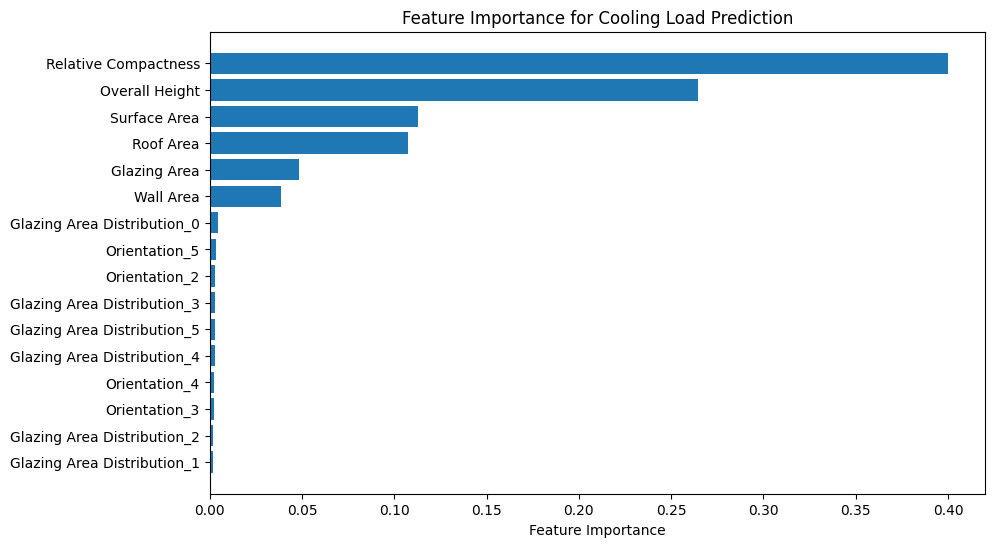

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names after preprocessing
feature_names = (
    num_features + 
    list(model.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(cat_features))
)

# Get feature importances from RandomForest
importances = model.named_steps["regressor"].feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Cooling Load Prediction")
plt.gca().invert_yaxis()  # highest on top
plt.show()


## 🔎 Conclusion

We built and evaluated Machine Learning models to predict **Heating Load** and **Cooling Load** of buildings based on their architectural features.  

### ✅ Key Results:
- **Heating Load**: R² ≈ 0.97 → The model explains ~97% of the variation.  
- **Cooling Load**: R² ≈ 0.96 → The model explains ~96% of the variation.  
- Errors (MAE ~1–2 units, RMSE ~2 units) were very low, showing the predictions are highly accurate.  

### 🔑 Insights from Feature Importance:
- **Surface Area** and **Wall Area** were among the most influential features.  
- **Glazing Area** also played a significant role in energy demand.  
- **Orientation** had relatively lower impact compared to physical building dimensions.  

### 🌍 Why This Matters:
- The results highlight how **building design choices** (compactness, surface area, glazing ratio) strongly affect energy efficiency.  
- By optimizing these parameters, architects and engineers can design **sustainable, energy-efficient buildings** that reduce heating and cooling demands.  
